# ΗΥ 494 - Εισαγωγή στο προγραμματισμό, εαρινό εξάμηνο 2023

### Γενικά

* Εδώ υπάρχει μία λίστα με 5 projects για το μάθημα.
* Όλοι οι φοιτητές θα πρέπει να υλοποιήσουν και τα 5 projects
* Τα projects είναι ατομικά
* Παρόλο το όνομά τους (projects) είναι στην ουσία μικρές ασκήσεις. Κάθε project θέλει το πολύ ~20 γραμμές για να υλοποιηθεί.
* Κάθε project απαίτεί το πολύ 5 λεπτά υπολογιστικό χρόνο και ελάχιστη μνήμη. Αν η υλοποίησή σας έχει πρόβλημα με χρόνο / μνήμη, τότε έχετε κάνει κάποιο πολύ βασικό λάθος!
* Όλα τα projects είναι βαθμολογικά ισοδύναμα αλλά δεν είναι το ίδιο δύσκολα. Ξεκινήστε από αυτά που σας φαίνονται πιο εύκολα!
* Όπως πάντα στείλτε στο slack απορίες.


# Project 1

* Σε αυτό το project θα ασχοληθούμε με το αν το μέγεθος ενός insertion ή ενός deletion έχει σημασία στην παθογένεια μίας μετάλλαξης.
* Θα μάθουμε επίσης να επεξεργαζόμαστε πολύ μεγάλα αρχεία!

To [CADD](https://cadd.gs.washington.edu/) είναι ένα εργαλείο με το οποίο μπορούμε να δούμε αν μία μετάλλαξη, σημειακή, insertion ή deletion είναι παθογόνα ή όχι. Οι δημιουργοί του εργαλείου έχουν φτιάξει σε [αυτή τη σελίδα](https://cadd.gs.washington.edu/download) μία συλλογή από αρχεία τα οποία περιέχουν ένα τεράστιο πλήθος από μεταλλάξεις όπου για κάθε μία περιέχει ένα σκορ παθογένειας. Όσο πιο μεγάλο είναι το σκορ τόσο πιο πιθανό είναι η μετάλλαξη να έχει συνέπειες στην υγεία (παθογένεια). Όπως παρατηρείται τα αρχεία αυτά είναι τεράστια! Για αυτό εμείς θα ασχοληθούμε μόνο με insertions και deletions. Θα πρέπει λοιπόν να κατεβάσετε το αρχείο `All gnomAD InDels (release 2.1.1)`, το οποίο υπάρχει σε αυτό το link: https://krishna.gs.washington.edu/download/CADD/v1.6/GRCh37/gnomad.genomes.r2.1.1.indel.tsv.gz. Το αρχείο αυτό είναι 387MB και είναι συμπιεσμένο. Ευτυχών **δεν χρειάζεται να το αποσυμπιέσετε**. Μέσω του πακέτου gzip (είναι μέρος της standard βιβλιοθήκης της python), μπορείτε να το διαβάσετε κάπως έτσι:


In [41]:
import gzip

def f1(filename):
    '''
    Τυπώνει τις πρώτες 3 γραμμές του αρχείου
    '''
    
    with gzip.open(filename, 'rt') as f:
        print (f.readline().strip())
        print (f.readline().strip())
        print (f.readline().strip())


In [42]:
fn = '/Users/admin/Downloads/gnomad.genomes.r2.1.1.indel.tsv.gz'
f1(fn)

## CADD GRCh37-v1.6 (c) University of Washington, Hudson-Alpha Institute for Biotechnology and Berlin Institute of Health 2013-2020. All rights reserved.
#Chrom	Pos	Ref	Alt	RawScore	PHRED
1	10067	T	TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC	-0.259293	0.483


Παρατηρούμε ότι αυτό το αρχείο είναι σε φορμάτ TSV (Tab Separated Values). Δηλαδή έχει στήλες χωρισμένες με tab (\t). Η 5η στήλη περιέχει ένα score για τη μετάλλαξη αυτής της γραμμής. Σε αυτό το site: https://cadd-sv.bihealth.org/info διαβάζουμε αρκετές πληροφορίες για το αρχείο αυτό και κυρίως για το score: `RawScore`:


>  "Raw" CADD scores come straight from the model, and are interpretable as the extent to which the annotation profile for a given variant suggests that the variant is likely to be "observed" (negative values) vs "simulated" (positive values).

Άρα σε αυτό το project θα ασχοληθούμε μόνο με τις αρνητικές τιμές (observed). Αυτό που πρέπει να κάνετε είναι. Φτιάξτε μία συνάρτηση η οποία θα παίρνει σαν όρισμα το path του αρχείου: `gnomad.genomes.r2.1.1.indel.tsv.gz`. και τον αριθμό ενός χρωμοσώματος (1..22). Η συνάρτηση θα πρέπει να παράγει ένα plot όπου:
* Στον x άξονα θα είναι το μήκος του insertion / deletion. Το μήκος του insertion είναι όσο το μήκος της ακολουθίας στη στήλη `Alt` μείον το μήκος της ακολουθίας στη στήλη `Ref`. Το μήκος του deletion είναι όσο το μήκος της ακολουθίας στη στήλη `Ref` μείον το μήκος της ακολουθίας στη στήλη `Alt`. Το αν είναι insertion ή deletion φαίνεται από το αν το `Ref`  ή το `Alt` είναι μεγαλύτερο (αν είναι τo `Ref` μεγαλύτερο τότε έχουμε deletion, διαφορετικά έχουμε insertion). Στον άξονα x θα είναι όλες οι τιμές από το 1 μέχρι και το 49.
* Στον άξονα y θα είναι ο μέσος όρος της απόλυτης τιμής του RawScore για αυτό το μήκος της ακολουθίας.
* Θα κάνετε δύο γραμμές μία μπλε για τα insertions και μία κόκκινη για τα deletions. 

Δίνεται το figure που βγήκε σε εμένα για το χρωμόσωμα 1:


In [49]:
def project_1(a,b,):
    pass


In [51]:
project_1('/Users/admin/Downloads/gnomad.genomes.r2.1.1.indel.tsv.gz', '1')

![img](https://i.imgur.com/vHVG6hJ.png)

Επεξήγηση: βλέπουμε για παράδειγμα ότι o μέσος όρος του απολύτου του RawScore για όλα τα deletions με μήκος 30 είναι (περίπου) 0.233. Ενώ ο μέσος όρος του απολύτου του RawScore για όλα τα insertions με μήκος 30 είναι 0.286.

Γνήσια απορία, άσχετη με το μάθημα αλλά μου γεννήθηκε όταν έγραφα την εκφώνηση (δεν βαθμολογείται): Γιατί βλέπουμε αυτή τη διαφορά μεταξύ insertions και deletions; Ή αλλιώς γιατί τα insertions είναι πιο επικίνδυνα από τα deletions; Mπορείτε να απαντήσετε με ένα μικρό σχόλιο στον κώδικά σας.

# Project 2
* Σε αυτό το project θα "τερματίσουμε" την if!

Η [ομάδα αίματος](https://en.wikipedia.org/wiki/Blood_type) ενός ανθρώπου καθορίζεται με βάση τα αντιγόνα Α και Β. Έτσι, ένας άνθρωπος μπορεί να ανήκει σε μία από τις 4 ομάδες αίματος:
* Ομάδα Α: Έχει το αντιγόνο Α και δεν έχει το Β
* Ομάδα Β: Έχει το αντίγόνο Β και δεν έχει το Α
* Ομάδα ΑΒ: Έχει το αντιγόνο Α και το αντιγόνο Β 
* Ομάδα Ο: Δεν έχει το αντιγόνο Α και δεν έχει το αντιγόνο Β.

Εκτός από τις ομάδες αίματος υπάρχει και ο παράγοντας Rhesus (D αντιγόνο). Οπότε επιπλέον ένας άνθρωπος μπορεί να είναι:
* Rhesus θετικός (Rh+): Αν έχει το αντιγόνο D
* Rhesus αρνητικός (Rh-): Αν δεν έχει το αντιγόνο D

Μία ομάδα αίματος παίρνει το όνομά της από τον συνδυασμό των αντιγόνων (Α,Β,ΑΒ και Ο) και το πρόσημο + ή - για τον παράγοντα Rhesus. Για παράδειγμα μερικές από τις ομάδες αίματος είναι: ΑΒ+, Β-, Ο+, κτλ.

Για τη μετάγγιση αίματος χρησιμοποιούνται οι παρακάτω κανόνες: 
* Όλοι της ομάδας Ο- μπορούν να δώσουν σε όλους
* Όλοι της ομάδας Ο+ μπορούν να δώσουν σε όλους τους Rh+
* Όλοι της ομάδας Β- μπορούν να δώσουν σε όλους του Β και του ΑΒ
* Όλοι της ομάδας Β+ μπορούν να δώσουν σε όλους του Β+ και τους ΑΒ+
* Όλοι της ομάδας Α- μπορούν να δώσουν σε όλους τους Α και τους ΑΒ
* Όλοι της ομάδας Α+ μπορούν να δώσουν σε όλους τους Α+ και τους ΑΒ+
* Όλοι της ομάδας ΑΒ- μπορούν να δώσουν σε όλους τους ΑΒ
* Όλοι της ομάδας ΑΒ+ μπορούν να δώσουν σε όλους τους ΑΒ+

Μία όμορφη αναπαράσταση αυτών των κανόνων υπάρχει εδώ ([πηγή](https://www.hema-quebec.qc.ca/sang/savoir-plus/groupes-sanguins.en.html)):
![img](https://www.hema-quebec.qc.ca/userfiles/image/photos/sang/anglais/Compatibilite-ang.jpg)

Φτιάξτε λοιπόν μία συνάρτηση η οποία θα παίρνει δύο string `donor`, `recipient`, τα οποία θα είναι η ομάδα αίματος ενός δότη και ενός λήπτης. Η συνάρτηση θα επιστρέφει True αν μπορεί να γίνει μετάγγιση αίματος από τον δότη στον λήπτη και False αν δεν μπορεί. 

Δίνεται ο τρόπος με τον οποίο θα εξεταστεί η συνάρτηση:

```python
print(f("O+", "O+")) # Τυπώνει: True
print(f("O+", "O-")) # Τυπώνει: False
print(f("O+", "A+")) # Τυπώνει: True
print(f("O+", "A-")) # Τυπώνει: False
print(f("O+", "B+")) # Τυπώνει: True
print(f("O+", "B-")) # Τυπώνει: False
print(f("O+", "AB+")) # Τυπώνει: True
print(f("O+", "AB-")) # Τυπώνει: False
print(f("O-", "O+")) # Τυπώνει: True
print(f("O-", "O-")) # Τυπώνει: True
print(f("O-", "A+")) # Τυπώνει: True
print(f("O-", "A-")) # Τυπώνει: True
print(f("O-", "B+")) # Τυπώνει: True
print(f("O-", "B-")) # Τυπώνει: True
print(f("O-", "AB+")) # Τυπώνει: True
print(f("O-", "AB-")) # Τυπώνει: True
print(f("A+", "O+")) # Τυπώνει: False
print(f("A+", "O-")) # Τυπώνει: False
print(f("A+", "A+")) # Τυπώνει: True
print(f("A+", "A-")) # Τυπώνει: False
print(f("A+", "B+")) # Τυπώνει: False
print(f("A+", "B-")) # Τυπώνει: False
print(f("A+", "AB+")) # Τυπώνει: True
print(f("A+", "AB-")) # Τυπώνει: False
print(f("A-", "O+")) # Τυπώνει: False
print(f("A-", "O-")) # Τυπώνει: False
print(f("A-", "A+")) # Τυπώνει: True
print(f("A-", "A-")) # Τυπώνει: True
print(f("A-", "B+")) # Τυπώνει: False
print(f("A-", "B-")) # Τυπώνει: False
print(f("A-", "AB+")) # Τυπώνει: True
print(f("A-", "AB-")) # Τυπώνει: True
print(f("B+", "O+")) # Τυπώνει: False
print(f("B+", "O-")) # Τυπώνει: False
print(f("B+", "A+")) # Τυπώνει: False
print(f("B+", "A-")) # Τυπώνει: False
print(f("B+", "B+")) # Τυπώνει: True
print(f("B+", "B-")) # Τυπώνει: False
print(f("B+", "AB+")) # Τυπώνει: True
print(f("B+", "AB-")) # Τυπώνει: False
print(f("B-", "O+")) # Τυπώνει: False
print(f("B-", "O-")) # Τυπώνει: False
print(f("B-", "A+")) # Τυπώνει: False
print(f("B-", "A-")) # Τυπώνει: False
print(f("B-", "B+")) # Τυπώνει: True
print(f("B-", "B-")) # Τυπώνει: True
print(f("B-", "AB+")) # Τυπώνει: True
print(f("B-", "AB-")) # Τυπώνει: True
print(f("AB+", "O+")) # Τυπώνει: False
print(f("AB+", "O-")) # Τυπώνει: False
print(f("AB+", "A+")) # Τυπώνει: False
print(f("AB+", "A-")) # Τυπώνει: False
print(f("AB+", "B+")) # Τυπώνει: False
print(f("AB+", "B-")) # Τυπώνει: False
print(f("AB+", "AB+")) # Τυπώνει: True
print(f("AB+", "AB-")) # Τυπώνει: False
print(f("AB-", "O+")) # Τυπώνει: False
print(f("AB-", "O-")) # Τυπώνει: False
print(f("AB-", "A+")) # Τυπώνει: False
print(f("AB-", "A-")) # Τυπώνει: False
print(f("AB-", "B+")) # Τυπώνει: False
print(f("AB-", "B-")) # Τυπώνει: False
print(f("AB-", "AB+")) # Τυπώνει: True
print(f("AB-", "AB-")) # Τυπώνει: True
```

**Σημείωση:**

Μην κάνετε:

```python
def f(donor, recipient):
    if donor == "O+" and recipend "O+":
        return True
    
    if donor == "O+" and recipent == "O-":
        return False
    
    # κτλ...
```

Μπορείτε να χρησιμποιήσετε μέχρι 20 "συγκρίσεις". Μία σύγκριση είναι η χρήση ενός οποιοδήποτε λογικού τελεστή. Για παράδειγμα ο παραπάνω κώδικας έχει 4 συγκρίσεις. Μία σύγκριση μπορεί να γίνει και χωρίς να υπάρχει τελεστής, αρκεί να υπάρχει ένα if. Για παράδειγμα ο παρακάτω κώδικας περιέχει 2 συγκρίσεις:

```python
if a:
    if b:
        print ('hello')
    else:
        print ('world')
else:
    print ('python')
```

Η δική μου υλοποίηση έχει μόνο 12 συγκρίσεις και σίγουρα μπορούν να γίνουν λιγότερες..


# Project 3

Πως σχηματίζονται τα φύλα στα φυτά;. Ας υποθέσουμε ότι έχουμε ένα λουλούδι το οποίο έχει n μικρά φύλα τα οποία βγαίνουν γύρω από έναν κύκλο (πχ. η μαργαρίτα), τα φύλα αυτά σχηματίζονται ως εξής:

* Το πρώτο φύλο το βάζουμε σε κάποιο τυχαίο σημείο του κύκλου
* Το δεύτερο φύλο το βάζουμε μετά από φ μοίρες αριστερόστροφα από το πρώτο.
* Το τρίτο φύλο το βάζουμε μετά από φ μοίρες αριστερόστροφρα από το δεύτερο.
* Συνεχίζουμε έτσι μετά για όλα τα φύλα. 


Υπενθυμίζουμε ότι ένας κύκλος έχει 360 μοίρες. Αν ενα σημείο του κύκλου βρίσκεται στις 350 μοίρες και από αυτό το σημείο πάμε 20 μοίρες αριστερόστροφα, τότε θα καταλήξουμε στις 10 μοίρες. Οπότε αν κάνουμε τη παραπάνω διαδικασία,  κάθε φύλο θα έχει τοποθετηθεί πάνω στον κύκλο και για κάθε φύλο θα έχουμε μία θέση η οποία θα είναι μία γωνία από 0 μέχρι 360 μοίρες. Ας πάρουμε τώρα όλα τα φύλα και ας τα ταξινομήσουμε με αύξουσα σειρά από το φύλο με τη μικρότερη γωνία προς το φύλο με τη μεγαλύτερη. Τώρα θα υπολογίσουμε το πλήθος από αποστάσεις γωνιών μεταξύ δύο διπλανών φύλλων. Το απίστευτο θεώρημα [three-gap theorem](https://en.wikipedia.org/wiki/Three-gap_theorem) λέει ότι:

1. Υπάρχουν το πολύ τρεις διαφορετικές αποστάσεις μεταξύ συνεχόμενων φύλων. Μπορεί δηλαδή να υπάρχουν 1,2 ή και 3. 
2. Αν υπάρχουν τρεις αποστάσεις, τότε το άθρισμα των δύο μικρότερων αποστάσεων θα είναι ίσο με τη μεγαλύτερη απόσταση.

Δίνεται ένα παράδειγμα. Ας υποθέοσυμε ότι έχουμε 10 φύλα σε αποστάσεις 55 μοιρών. Τότε αν ξεκινήσουμε από τη 0 μοίρα, η θέση τους πάνω στον κύκλο θα είναι:

```
1ο φύλο --> 0 μοίρες
2o φύλο --> 55 μοίρες
3ο φύλο --> 110 μοίρες
4ο φύλο --> 165 μοίρες
5ο φύλο --> 220 μοίρες
6ο φύλο --> 275 μοίρες
7ο φύλο --> 330 μοίρες
8ο φύλο --> 25 μοίρες (330 + 55 = 385 = 360 + 25)
90 φύλο --> 80 μοίρες
10ο φύλο --> 135 μοίρες
```

Αν ταξινομήσουμε τα φύλα με βάση τη θέση τους στον κύκλο θα έχουμε:

```
Φύλο: 1, Θέση 0 μοίρες 
Φύλο: 8, Θέση 25 μοίρες 
Φύλο: 2, Θέση 55 μοίρες 
Φύλο: 9, Θέση 80 μοίρες 
Φύλο: 3, Θέση 110 μοίρες 
Φύλο: 10, Θέση 135 μοίρες 
Φύλο: 4, Θέση 165 μοίρες 
Φύλο: 5, Θέση 220 μοίρες 
Φύλο: 6, Θέση 275 μοίρες 
Φύλο: 7, Θέση 330 μοίρες 
```

Αν μετρήσουμε τις διαφορές μεταξύ διπλανών φύλων θα δούμε ότι:

```
Διαφορά 1-8 --> 25 μοίρες
Διαφορά 8-2 --> 25 μοίρες
Διαφορά 2-9 --> 25 μοίρες
Διαφορά 9-3 --> 30 μοίρες
Διαφορά 3-10 --> 25 μοίρες
Διαφορά 10-4 --> 30 μοίρες
Διαφορά 4-5 --> 55 μοίρες
Διαφορά 5-6 --> 55 μοίρες
Διαφορά 6-7 --> 55 μοίρες
Διαφορά 7-1 --> 30 μοίρες
```

Παρατηρούμε ότι συνολικά υπάρχουν 3 διαφορετικές διαφορές! Η 25, η 30 και η 55. Παρατηρούμε επίσης ότι το άθροισμα των 2 μικρότερων (25,30) είναι ίσο με τη μεγαλύτερη (55).

Φτιάξτε λοιπόν μία συνάρτηση η οποία θα παίρνει σαν παράμετρο δύο αριθμούς. Ο πρώτος θα είναι απόσταση σε μοίρες μεταξύ των φύλων του και η δεύτερη θα είναι το πλήθος από φύλα. 
* Αν οι διαφορετικές αποστάσεις (όπως υπολογίστηκαν παραπάνω) δεν είναι 3, τότε η συνάρτηση δεν επιστρέφει τίποτα.
* Αν οι διαφορετικές αποστάσεις είναι 3. Τότε επιστρέφει ένα string : Χ = Υ + Ζ. Όπου Χ είναι η μεγαλύτερη από τις 3 αποστάσεις και Υ,Ζ οι δύο μικρότερες. 

Δίνονται μερικά παραδείγματα:



In [29]:
print (f(55, 10))

55 = 25 + 30


In [31]:
print (f(3, 1000))

None


In [35]:
print (f(14, 100))

6 = 2 + 4


In [36]:
print (f(46, 20))

38 = 8 + 30


# Project 4

Η [δευτεροταγής δομή του RNA](https://misciwriters.com/2021/03/26/dr-kevin-weeks-a-map-of-rna-structural-landscapes/), εκτός από συμπληρωματικές αλληλουχίες μπορεί να περιέχει διάφορα στοιχεία όπως προεξοχές, εσωτερικές θηλιές και φουρκέτες. Για τη μοντελοποίηση αυτής της δομής χρησιμοποιούμε το φορμάτ Dot-bracket format. [Περισσότερα για το φορμάτ μπορείτε να βρείτε εδώ](https://software.broadinstitute.org/software/igv/rnasecstructure).

Γενικότερα η περιγραφή του secondary structure γίνεται με ένα string το οποίο περιέχει τους χαρακτήρες: `(`, `)`, `.`, `[`, `]`. Όπου:

* Ασύζευκτα νουκλεοτίδια (unpaired nucleotides) κωδικοποιούνται με τελεία.
* Νουκλεοτίδια τα οποία έχουν γίνει ζεύξη (paired nucleotides) κωδικοποιούνται με παρενθέσεις οι οποίες που ανοίγουν-κλείνουν: `()`. Για παράδειγμα:

```
GGUCAGACC
(((...)))
```

Σε αυτό το παράδειγμα:
* το 1ο G είναι σε ζεύξη με το τελευταίο C
* Το 2ο G είναι σε ζεύξη με το προτελευταίο C
* To 3o U είναι σε ζεύξη με το προ-προτελευταίο Α
* Στη "μέση" υπάρχει "φουρκέτα" με τα νουκλεοτίδα `CAG`. 

Μπορείτε να χρησιμοποιήσετε το εργαλείο [rnapbee](http://rnapdbee.cs.put.poznan.pl) για να οπτικοποιήσετε μία τέτοια δομή. Πηγαίνετε στο (...) --> Image και μετά επιλέξτε "show file contents" και εισάγετε τη παραπάνω δομή στο πλαίσιο που εμφανίζεται. Στη συνέχεια πατήστε το "Run". Λογικά θα εμφανιστεί η δομή του RNA:

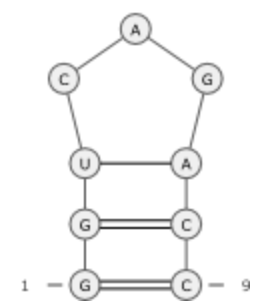

Το dot-bracket format επιτρέπει επίσης και την ύπαρξη ψευδοκόμβων (pseudoknots) τα οποία κωδικοποιούνται με αγκύλες `[]`.

Ένα παράδειγμα από μία δευτεροταγής δομή που έχει όλα τα παραπάνω στοιχεία είναι:

```
GGUGCAUGCCGAGGGGCGGUUGGCCUCGUAAAAAGCCGCAAAAAAUAGCAUGUAGUACC
((((((((((((((.[[[[[[..))))).....]]]]]]........)))))...))))
```

Μπορείτε επίσης να πειραματιστείτε και με τη [δευτερεταγή δομή του RNA του ιού του HIV](https://github.com/pylelab/RSCanner/blob/main/sample_test_files/HIV.dot) η οποία είναι τεράστια!

Φτιάξτε λοιπόν μία συνάρτηση η οποία θα παίρνει δύο παράμετρους. Η πρώτη θα είναι μία ακολουθία RNA και η 2η θα είναι η δευτεροταγής ακολουθία της σε dot-bracket format. Η συνάρτηση θα τυπώνει όλα τα ζευγάρια που περιέχει η δευτεροταγής δομή. Κάθε ζευγάρι θα αποτελείται απο ένα string το οποίο θα αποτελείται από τα εξής:
* PAIR ή PSEUDO ανάλογα με το άν πρόκειται για paired ζευγάρι ή για pseudopaired ζευγάρι
* Τη θέση του 1ου και τη θέση του 2ο νουκλεοτιδίου του ζευγαριού
* Το ζευγάρι με τα νουκλεοτίδια.

Δίνεται ένα παράδειγμα:


In [91]:
rna = 'GGUGCAUGCCGAGGGGCGGUUGGCCUCGUAAAAAGCCGCAAAAAAUAGCAUGUAGUACC'
s   = '((((((((((((((.[[[[[[..))))).....]]]]]]........)))))...))))'

f(rna, s)
# Τυπώνει:

```
PAIR: 14 - 24  G-C
PAIR: 13 - 25  G-C
PAIR: 12 - 26  A-U
PAIR: 11 - 27  G-C
PAIR: 10 - 28  C-G
PSEYDO: 21 - 34  U-A
PSEYDO: 20 - 35  U-G
PSEYDO: 19 - 36  G-C
PSEYDO: 18 - 37  G-C
PSEYDO: 17 - 38  C-G
PSEYDO: 16 - 39  G-C
PAIR: 9 - 48  C-G
PAIR: 8 - 49  G-C
PAIR: 7 - 50  U-A
PAIR: 6 - 51  A-U
PAIR: 5 - 52  C-G
PAIR: 4 - 56  G-U
PAIR: 3 - 57  U-A
PAIR: 2 - 58  G-C
PAIR: 1 - 59  G-C

```

# Project 5

Με τη τεχνική [Single cell sequencing](https://en.wikipedia.org/wiki/Single-cell_sequencing), μπορούμε να μετρήσουμε την έκφραση σε κάθε γονίδιο για διαφορετικά κύτταρα σε ένα δείγμα. Αυτή η τεχνική είναι πολύ σημαντική στην έρευνα στον καρκίνο αφού μας δίνει τη δυνατότητα να δούμε πως διαφοροποιούνται τα κύτταρα σε διάφορα στάδια της νόσου. Η τεχνική αυτή είναι σχετικά πρόσφατη, σε αντίθεση με τεχνικές RNA-seq με τις οποίες μετράμε την έκφραση των γονιδίων συνολικά σε έναν ιστό (όχι ανά κύτταρο). Έτσι, παρόλο που υπάρχει τεράστια διαθεσιμότητα σε RNA-seq πειράματα, υπάρχουν λίγα σε Since-cell sequencing. Συνεπώς, ένα ερώτημα που έχει προκύψει είναι:

Μπορούμε να μετρήσουμε την έκφραση των γονιδίων σε διαφορετικούς τύπους κυττάρων μέσα από πειράματα RNA-seq;

Μία πολύ καλή [δημοσίευση](https://academic.oup.com/bioinformatics/article/36/Supplement_1/i407/5870501) ασχολείται ακριβώς με αυτό:

> Tao, Yifeng, Haoyun Lei, Xuecong Fu, Adrian V. Lee, Jian Ma, and Russell Schwartz. "Robust and accurate deconvolution of tumor populations uncovers evolutionary mechanisms of breast cancer metastasis." Bioinformatics 36, no. Supplement_1 (2020): i407-i416.

Η δημοσίευση αυτή μοντελοποιεί το πρόβλημα ως εξής:

Ας υποθέσουμε ότι έχουμε Κ είδη κυττάρων (cell groups), Μ γονίδια και Ν δείγματα. Τότε το πείραμα RNA-seq θα έχει παράξει έναν πίνακα Μ x N (M γραμμές, Ν στήλες), όπου στη γραμμή μ και στη στήλη ν, θα βρίσκεται η τιμή της έκφρασης του μ-οστού γονιδίου στο ν-οστό δείγμα. Αυτός ο πίνακας αναφέρεται ως B στη δημοσίευση. Δεδομένου λοιπόν ότι υπάρχουν Κ είδη κυττάρων τότε υπάρχουν 2 πίνακες C και F. O C έχει Μ γραμμές και K στήλες και στη μ-οστή γραμμή, κ-οστή στήλη περιέχει το πόσο εκφράζεται το μ-οστό γονίδιο στο κ-οστό είδος κυττάρων. Ο πίνακας F έχει Κ γραμμές και Ν στήλες, όπου στη κ-οστή γραμμή και στη ν-οστή στήλη θα περιέχει το κάτα πόσο το ν-σοτό δείγμα περιέχει το κ-οστό είδος κυττάρων. Mαθηματικά το πρόβλημα ορίζεται ως εξής:

Ας υποθέσουμε ότι η είσοδος είναι το Β. Θα πρέπει να βρείτε δύο πίνακες C και F τέτοιοι ώστε το γίνόμενο των C και F να είναι όσο το δυνατόν πιο "κοντά" στο B. Στο paper (κεφάλαιο 2.2.1, εξίσωση 1) αυτό ορίζεται ως η ελαχιστοποίηση της έκφρασης ||B-CF||<sub>Fr</sub>, όπου ||X||<sub>Fr</sub> είναι η [Frobenius νόρμα](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm) ενός πίνακα η οποία υπολογίζεται με την εξής συνάρτηση:


In [40]:
import numpy as np

def frobenius_norm(X):
    # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html 
    return np.linalg.norm(X, 'fro')

Το paper επίσης περιγράφει έναν αλγόριθμο για το πως μπορείτε να ελαχιστοποιήσετε αυτήν την έκφραση (κεφάλαιο 2.3.3).

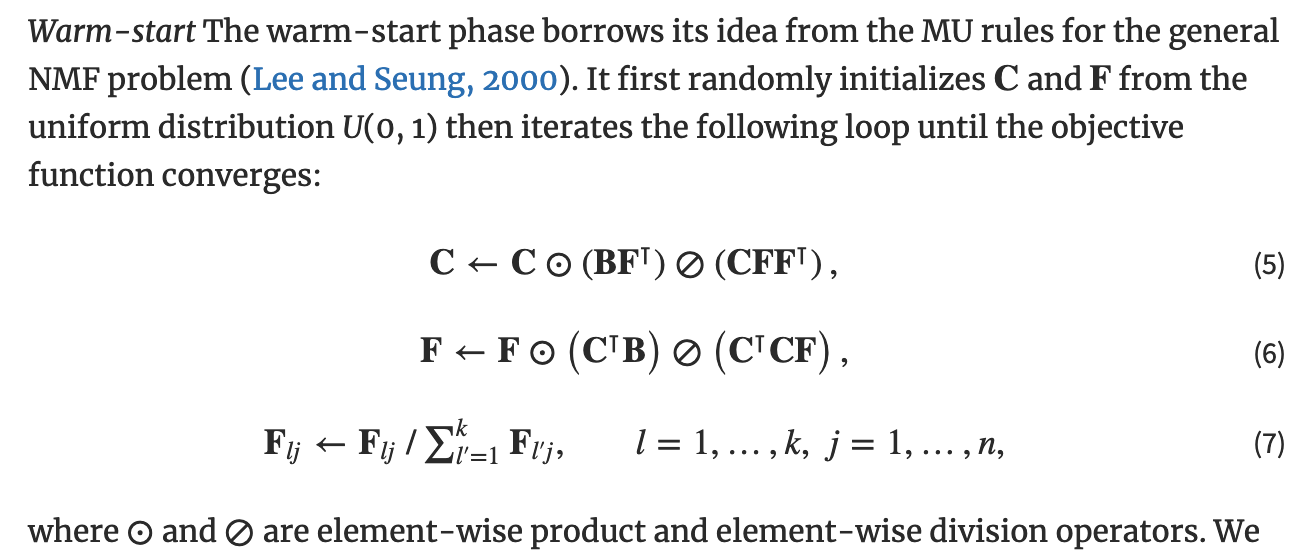



Σκοπός αυτού του project είναι να δούμε ότι ο φαινομενικά πολύπλοκος μαθηματικός φορμαλισμός είναι στην ουσία απλοί υπολογισμοί. Ξεκινάμε:

> It first randomly initializes C and F from the uniform distribution U(0, 1)

Θα πρέπει να αρχικοποίσετε τους C και F από την ομοιόμορφη κατανομή. Αν ένας πίνακας έχει διαστάσεις 3 x 4, αυτό γίνεται με:


In [41]:
np.random.random((3,4))

array([[0.02629181, 0.81804889, 0.11016458, 0.84410999],
       [0.16171427, 0.07583471, 0.54422771, 0.35871755],
       [0.59915099, 0.64900398, 0.67209911, 0.18838452]])

Στη συνέχεια λέει:

> Then iterates the following loop until the objective function converges: 

Άρα θα πρέπει να επαναλάβετε κάποιους υπολογισμούς μέχρι να ελαχιστοποιηθεί μία συνάρτηση. Η συνάρτηση αυτή είναι η Frobenius norm του πίνακα: B-CF. Σε κάθε επανάληψη θα πρέπει να υπολογίσετε τους νέους C και F από τη προηγούμενη επανάληψη. Αυτό γίνεται ως εξής:

C ← C ⊙ (BF<sup>T</sup>)⊘(CFF<sup>T</sup>)

F ← F ⊙ (C<sup>T></sup>B) ⊘ (C<sup>t</sup>CF)

Ας δούμε λίγο αυτές τις πράξεις:

Όποτε βλέπου δύο πίνακες "μαζί" (π.χ. ΑΒ) τότε έχουμε πολλαπλασιασμό πινάκων. Αυτό γίνεται με τη συνάρτηση [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html):


In [54]:
A = np.random.random((3,4))
B = np.random.random((4,5))

# AB
np.dot(A,B)

array([[0.4418974 , 1.12461737, 0.52371222, 1.05623268, 0.9307065 ],
       [0.82986141, 1.38176572, 1.07238783, 1.54688055, 1.283676  ],
       [1.14142534, 1.54804468, 1.08487712, 1.54836849, 1.70664941]])

Μπορούμε να πολλαπλασιάσουμε και 3 πίνακες: `ABC = np.dot(A, np.log(B, C))`

Η πράξη ⊙ είναι ο element wise πολλαπλασιασμός πινάκων:

In [48]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[7,8,9], [10,11,12]])

# A⊙B
A*B

array([[ 7, 16, 27],
       [40, 55, 72]])

Η πράξη ⊘ είναι η element wise διαίρεση πινάκων:
    

In [49]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[7,8,9], [10,11,12]])

# A⊘B
A / B

array([[0.14285714, 0.25      , 0.33333333],
       [0.4       , 0.45454545, 0.5       ]])

Τέλος ο πίνακας Α<sup>T</sup> είναι ο [ανάστροφος](https://el.wikipedia.org/wiki/%CE%91%CE%BD%CE%AC%CF%83%CF%84%CF%81%CE%BF%CF%86%CE%BF%CF%82_%CF%80%CE%AF%CE%BD%CE%B1%CE%BA%CE%B1%CF%82) του Α:

In [55]:
A = np.array([[1,2,3], [4,5,6]])

print (A)
print ('----')
print (Α.T)

[[1 2 3]
 [4 5 6]]
----
[[1 4]
 [2 5]
 [3 6]]


Επίσης μετά τον υπολογισμό του F σε κάθε επανάληψη θα πρέπει να κάνετε:
    
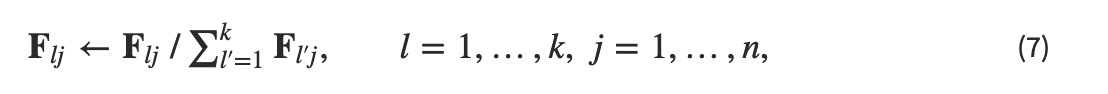

Δηλαδή το κάθε στοιχείου το F θα είναι ίσο με τη διαίρεσή του με το άθροισμα της στήλης που ανήκει. Για παράδειγμα:

In [66]:
A = np.array([[1,2,3], [5,3,9]])
print (A)

[[1 2 3]
 [5 3 9]]


In [67]:
# ...
# Απίστευτα πολύπλοκος κώδικας όπου διαιρεί κάθε στοιχείο του Α με το άθροισμα της στήλης που ανήκει
# Το αποτέλεσμα το αποθηκεύει στον πίνακα Α2
# ...
print (A2)

[[0.16666667 0.4        0.25      ]
 [0.83333333 0.6        0.75      ]]


Αυτή η επαναληπτική συνάρτηση μπορεί να σταματήσει όταν η έκφραση ||B-CF||<sub>Fr</sub> (ή αλλιώς αντικειμενική συνάρτηση) να μην ελαχιστοποιείται άλλο. Για να το ορίσετε αυτό μπορείτε να πείτε ότι η επανάληψη σταματάει όταν η τιμή της μεταβληθεί λιγότερο από 0.1 από τη προηγούμενη επανάληψη. 

Φτιάξτε λοιπόν μία συνάρτηση η οποία θα παίρνει δύο ορίσματα έναν numpy πίνακα B και έναν αριθμό Κ (πλήθος από είδη κυττάρων). Αν υποθέσουμε ότι ο Β είναι διαστάσεων M x N, τότε η συνάρτηση θα πρέπει να επιστρέφει δύο πίνακες C (M x K) και F (K x N) για τους οποίου η έκφραση ||B-CF||<sub>Fr</sub> (ή αλλιώς αντικειμενική συνάρτηση) να παίρνει τη μικρότερη τιμή. Η συνάρτηση θα πρέπει να εφαρμόζει τη διαδικασία που περιγράφηκε παραπάνω. H συνάρτηση θα πρέπει να φτιάχνει ένα πλοτ με τη "πρόοδο" της αντικειμενικής συνάρτησης. Δηλαδή στον άξονα Χ θα έχει τις τιμές 1,2,3,4, ... και στον άξονα Υ την αντίστοιχη τιμή της αντικειμενικής συνάρτησης. 

Για να δοκιμάσετε τον κώδικά σας μπορείτε να τον τρέξετε με τις παρακάτω τιμές (εμφανίζεται επίσης το πλοτ που έβγαλε η δική μου υλοποίηση):

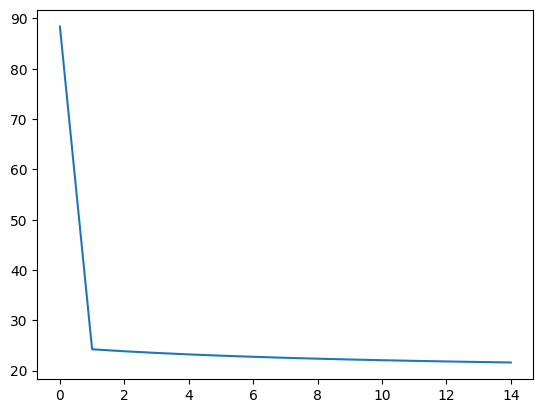

In [96]:
import numpy as np

K = 10 # Cell groups
M = 100 # Genes
N = 20 # Samples

real_C = np.random.random((M,K))
real_F = np.random.random((K,N))
B = np.dot(real_C , real_F)

C, F = f(B, K)
